In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
a = 1


b = np.linspace(0, 1+np.sqrt(2)+np.sqrt(3), 100)
kx = np.zeros_like(b)
ky = np.zeros_like(b)
kz = np.zeros_like(b)

for i in range(len(b)):
    if b[i] <= np.sqrt(2):
        kx[i] = 0
        ky[i] = np.pi/a*(b[i]/np.sqrt(2))
        kz[i] = np.pi/a*(b[i]/np.sqrt(2))
    elif b[i] <= np.sqrt(2)+1:
        kx[i] = np.pi/a*(b[i]-1)
        ky[i] = np.pi/a
        kz[i] = np.pi/a
    else:
        kx[i] = np.pi/a - np.pi/a*(b[i]-1-np.sqrt(2))/np.sqrt(3)
        ky[i] = np.pi/a - np.pi/a*(b[i]-1-np.sqrt(2))/np.sqrt(3)
        kz[i] = np.pi/a - np.pi/a*(b[i]-1-np.sqrt(2))/np.sqrt(3)

In [14]:
def dot(k, a):
    return k[0]*a[0]+k[1]*a[1]+k[2]*a[2]

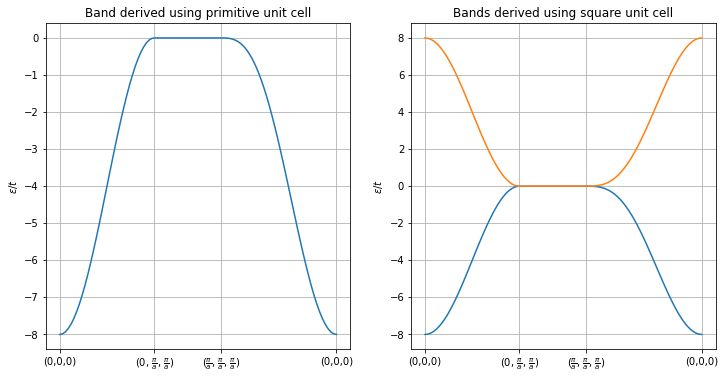

In [48]:
a1 = a/2*np.array([-1, 1, 1])
a2 = a/2*np.array([1, -1, 1])
a3 = a/2*np.array([1, 1, -1])

a4 = a*np.array([1, 0, 0])
a5 = a*np.array([0, 1, 0])
a6 = a*np.array([0, 0, 1])


k = [kx, ky, kz]
E1 = -2*(np.cos(dot(k, a1)) + np.cos(dot(k, a2)) + np.cos(dot(k, a3)) + np.cos(dot(k, a1+a2+a3)))

M21 = -(1 + np.exp(1j*dot(k, a4)) + np.exp(1j*dot(k, a5)) + np.exp(1j*dot(k, a6))
        + np.exp(1j*dot(k, a4+a5)) + np.exp(1j*dot(k, a5+a6)) + np.exp(1j*dot(k, a4+a6))
        + np.exp(1j*dot(k, a4+a5+a6)))
E2 = np.absolute(M21)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

axes[0].plot(b, E1)
axes[0].set_xticks([0, np.sqrt(2), 1+np.sqrt(2), 1+np.sqrt(2)+np.sqrt(3)], ['(0,0,0)', r'(0, $\frac{\pi}{a}$, $\frac{\pi}{a}$)', r'($\frac{\pi}{a}$, $\frac{\pi}{a}$, $\frac{\pi}{a}$)', '(0,0,0)'])
axes[0].set_ylabel(r'$\epsilon/t$')
axes[0].grid()
axes[0].set_title('Band derived using primitive unit cell')

axes[1].plot(b, -E2)
axes[1].plot(b, E2)
axes[1].set_xticks([0, np.sqrt(2), 1+np.sqrt(2), 1+np.sqrt(2)+np.sqrt(3)], ['(0,0,0)', r'(0, $\frac{\pi}{a}$, $\frac{\pi}{a}$)', r'($\frac{\pi}{a}$, $\frac{\pi}{a}$, $\frac{\pi}{a}$)', '(0,0,0)'])
axes[1].set_ylabel(r'$\epsilon/t$')
axes[1].grid()
axes[1].set_title('Bands derived using square unit cell')

fig.savefig('./hw9p2.pdf')